## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN','NAME'], axis=1, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


Target variable = IS_SUCCESSFUL -- 1 is considered yes (successful) and 0 is considered no (not successful)

Features = there are 9 features - all the other columns

In [3]:
# Determine the number of unique values in each column.
application_cat = application_df.dtypes.index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_count = application_df['APPLICATION_TYPE'].value_counts()
application_type_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_type_count[application_type_count < 600].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_count = application_df['CLASSIFICATION'].value_counts()
class_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count[class_count < 300].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: count, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_application_df = pd.get_dummies(application_df, dtype=int)
numeric_application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
y = numeric_application_df["IS_SUCCESSFUL"].values
X = numeric_application_df.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

# FIRST ATTEMPT

APPLICATION_TYPE cutoff = 600

CLASSIFICATION cutoff = 300

layer1 = 8 : activation function = relu

layer2 = 5 : activation function = relu

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 352       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6572 - accuracy: 0.6688
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5792 - accuracy: 0.7237
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5671 - accuracy: 0.7255
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5617 - accuracy: 0.7262
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5591 - accuracy: 0.7285
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5575 - accuracy: 0.7290
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5563 - accuracy: 0.7287
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7299
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7304
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5534 - accura

In [15]:
# Evaluate the model using the test data - FIRST ATTEMPT
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5533 - accuracy: 0.7252 - 529ms/epoch - 2ms/step
Loss: 0.5532517433166504, Accuracy: 0.7252478003501892


In [31]:
# Export our model to HDF5 file
#  To Save a Tensorflow Model-- this is the code to do it:
# Export our model to HDF5 file
nn.save("alphabetsoupcharityOptimization1.h5")

<Axes: >

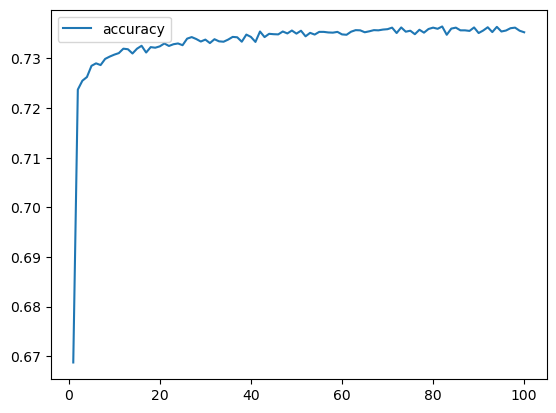

In [17]:
# plotting the accuracy - FIRST ATTEMPT
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

# SECOND ATTEMPT - adding a hidden layer

layer1 = 9 : activation function = relu

layer2 = 18 : activation function = relu

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer. SECOND ATTEMPT
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  9
hidden_nodes_layer2 = 18



nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 396       
                                                                 
 dense_4 (Dense)             (None, 18)                180       
                                                                 
 dense_5 (Dense)             (None, 1)                 19        
                                                                 
Total params: 595
Trainable params: 595
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Train the model (SECOND ATTEMPT)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5840 - accuracy: 0.7091
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5607 - accuracy: 0.7252
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5564 - accuracy: 0.7292
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5544 - accuracy: 0.7298
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7301
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5521 - accuracy: 0.7302
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5511 - accuracy: 0.7300
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5506 - accuracy: 0.7303
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5499 - accuracy: 0.7308
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5497 - accura

In [21]:
# Evaluate the model using the test data - SECOND ATTEMPT
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5548 - accuracy: 0.7248 - 785ms/epoch - 3ms/step
Loss: 0.5547958016395569, Accuracy: 0.724781334400177


In [32]:
# Export our model to HDF5 file - SECOND ATTEMPT
# or other way to save filepath = r"C:\Users\prachi\Deep_Learning_Challenge\deep-learning-challenge\AlphabetSoupCharity_Optimization.h5"
#nn.save(filepath, save_format='h5')

#  To Save a Tensorflow Model-- this is the code to do it:
# Export our model to HDF5 file
nn.save("alphabetsoupcharityOptimization2.h5")



<Axes: >

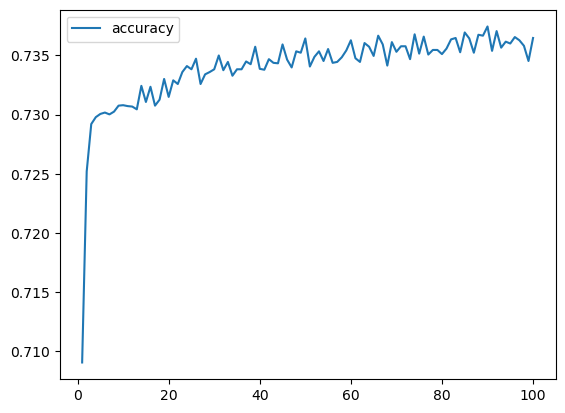

In [23]:
# plotting the accuracy - SECOND ATTEMPT
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

# THIRD ATTEMPT - adding a hidden layer

layer1 = 12 : activation function = relu

layer2 = 24 : activation function = relu

layer3 = 36 : activation function = relu

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer. THIRD ATTEMPT
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 24
hidden_nodes_layer3 = 36


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                528       
                                                                 
 dense_7 (Dense)             (None, 24)                312       
                                                                 
 dense_8 (Dense)             (None, 36)                900       
                                                                 
 dense_9 (Dense)             (None, 1)                 37        
                                                                 
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Train the model (THIRD ATTEMPT)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5873 - accuracy: 0.7098
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5585 - accuracy: 0.7266
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5541 - accuracy: 0.7298
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5516 - accuracy: 0.7314
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5497 - accuracy: 0.7322
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5490 - accuracy: 0.7325
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5481 - accuracy: 0.7337
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5478 - accuracy: 0.7339
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5470 - accuracy: 0.7352
Epoch 10/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5467 - accura

In [27]:
# Evaluate the model using the test data - THIRD ATTEMPT
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5535 - accuracy: 0.7256 - 978ms/epoch - 4ms/step
Loss: 0.5535320043563843, Accuracy: 0.7255976796150208


In [33]:
#  To Save a Tensorflow Model-- this is the code to do it:
# Export our model to HDF5 file - THIRD ATTEMPT
nn.save("alphabetsoupcharityOptimization3.h5")

<Axes: >

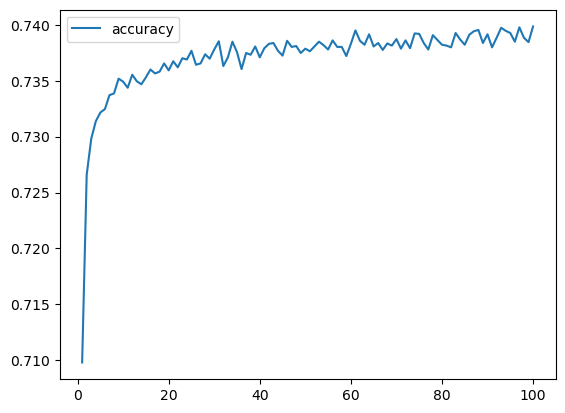

In [28]:
# plotting the accuracy - THIRD ATTEMPT
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

#RESULTS:

APPLICATION_TYPE cutoff = 600

CLASSIFICATION cutoff = 300

#ATTEMPT FIRST :
layer1 = 8 : activation function = relu

layer2 = 5 : activation function = relu

Loss: 0.55, Accuracy: 0.72

A loss value of 55 indicates that the model can be further optimized.

#ATTEMPT SECOND :
layer1 = 9 : activation function = relu

layer2 = 18 : activation function = relu

Loss: 0.553, Accuracy: 0.727

A loss value of 55 indicates that the model can be further optimized.

#ATTEMPT THIRD :
layer1 = 12 : activation function = relu

layer2 = 24 : activation function = relu

layer3 = 36 : activation function = relu

Loss: 0.553, Accuracy: 0.727

The accuracy percent shows that 72% of the model's predicted values align with the true values in the original dataset.

The model was required to achieve a target predicted accureacy higher than 75%. I did three attempts using different neural networks. they all resulted in the same accuracy rate - around 72%, a little short of the required target accuracy.
